In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from ruamel.yaml import YAML
import matplotlib.ticker as ticker

import os
import sys 
sys.path.append("../src")
from Fitness.PMO import Calculate_PMO


In [78]:
yaml = YAML()
main_path = os.getcwd()
with open("../data/Info_species_fitness.yaml", "r") as f:
    data = yaml.load(f)
Name_Folder = "0D"
flag_output= True

data_d = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_Detailed.csv")
data_r = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_Reduced.csv")
data_o = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_OptimA.csv")
data_ob = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_OptimB.csv")

case = data_d["P_Init"].nunique()*  data_d["T_Init"].nunique()  *  data_d["Phi_Init"].nunique()  *  data_d["Mixt_Init"].nunique() 
lenght= int(data_d.shape[0]/ case)

In [79]:
Err_r,F1r,F2r,F3r,F4r = Calculate_PMO(data_d,data_r,data,main_path,flag_output)
Err_A,F1o,F2o,F3o,F4o = Calculate_PMO(data_d,data_o,data,main_path,flag_output)
Err_B,F1ob,F2ob,F3ob,F4ob = Calculate_PMO(data_d,data_ob,data,main_path,flag_output)
integrate_species = [species for species, values in data.items() if values["Integrate"] == 1]
peak_species = [species for species, values in data.items() if values["Peak"] == 1]

Err PMO = 8.02e+00
Err PMO = 6.37e+00
Err PMO = 6.98e+00


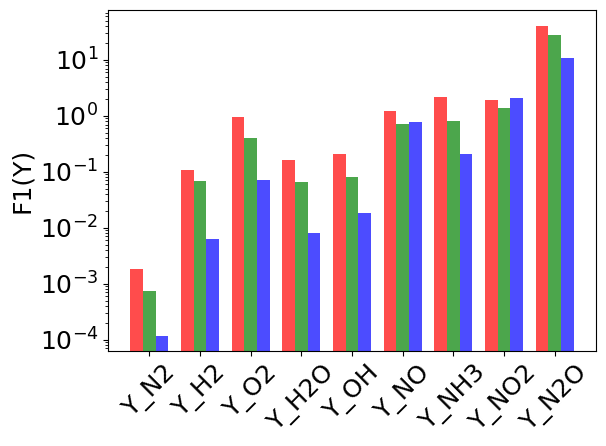

In [86]:

# Définir la largeur des barres
bar_width = 0.25
plt.rcParams.update({'font.size': 18})
plt.figure()

# Positions sur l'axe des x pour chaque barre (en fonction du nombre d'espèces)
x = np.arange(len(integrate_species))

# Ajouter les barres pour F1r[0], F1o[0] et F1ob[0]
plt.bar(x - bar_width, np.sum(F1r, axis=0), width=bar_width,color="r", label="Reduced", alpha=0.7)
plt.bar(x, np.sum(F1o, axis=0), width=bar_width,color= "g", label="OPTIM A", alpha=0.7)
plt.bar(x + bar_width, np.sum(F1ob, axis=0), width=bar_width, color="b",label="OPTIM B", alpha=0.7)

# Ajouter des titres et des labels

plt.ylabel("F1(Y)")
plt.xticks(x, integrate_species, rotation=45)
plt.yscale("log")
plt.tight_layout()
plt.savefig("PMO_Err_F1.png")

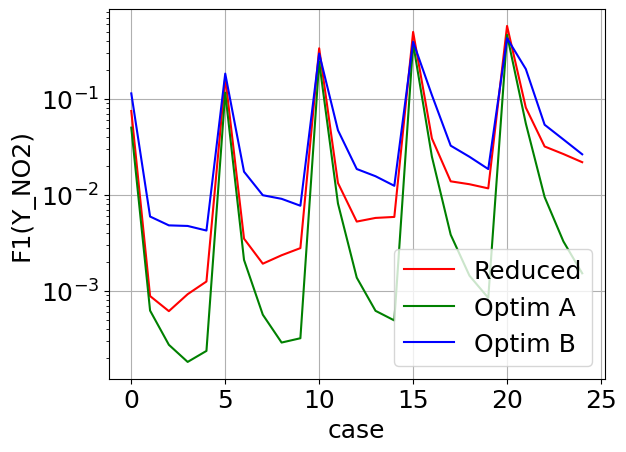

In [89]:
species = "Y_NO2"
plt.figure()
plt.plot(np.array(F1r)[:,integrate_species.index(species)],"r",label="Reduced")
plt.plot(np.array(F1o)[:,integrate_species.index(species)],"g",label="Optim A")
plt.plot(np.array(F1ob)[:,integrate_species.index(species)],'b',label="Optim B")
plt.legend()
plt.xlabel("case")
plt.ylabel(f"F1({species})")
plt.yscale("log")
plt.grid()

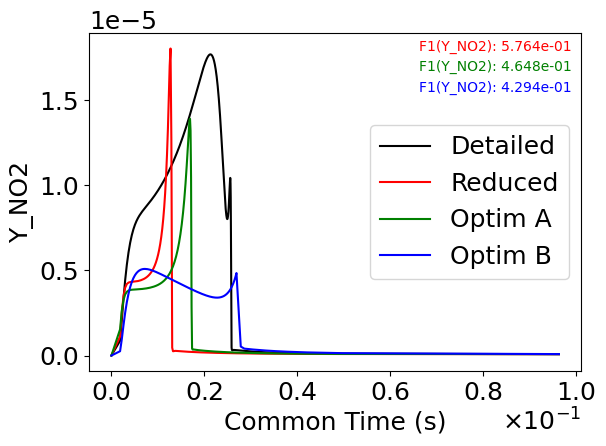

In [95]:
species = "Y_NO2"
selected_case = 20

loc_data_d = data_d.iloc[selected_case*lenght:selected_case*lenght+lenght]
loc_data_r =data_r.iloc[selected_case*lenght:selected_case*lenght+lenght]
loc_data_o =data_o.iloc[selected_case*lenght:selected_case*lenght+lenght]
loc_data_ob = data_ob.iloc[selected_case*lenght:selected_case*lenght+lenght]
plt.figure()

# Tracé des courbes
plt.plot(loc_data_d["common_grid"], loc_data_d[species], 'k', label="Detailed")
plt.plot(loc_data_r["common_grid"], loc_data_r[species], 'r', label="Reduced")
plt.plot(loc_data_o["common_grid"], loc_data_o[species], 'g', label="Optim A")
plt.plot(loc_data_ob["common_grid"], loc_data_ob[species], 'b', label="Optim B")

# Limites, légendes et axes
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
plt.legend()
plt.ylabel(f"{species}")
plt.xlabel("Common Time (s)")

# Récupération des valeurs
val_r = np.array(F1r)[selected_case,integrate_species.index(species)]
val_o = np.array(F1o)[selected_case,integrate_species.index(species)]
val_ob = np.array(F1ob)[selected_case,integrate_species.index(species)]

# Position de départ du texte (en coordonnées Axes)
x_text = 0.98
y_start = 0.98
line_spacing = 0.06

# Texte coloré
plt.gca().text(x_text, y_start,     f"F1({species}): {val_r:.3e}", color='r',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')
plt.gca().text(x_text, y_start - line_spacing, f"F1({species}): {val_o:.3e}", color='g',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')
plt.gca().text(x_text, y_start - 2*line_spacing, f"F1({species}): {val_ob:.3e}", color='b',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.savefig(f"PMO_F1_{species}.png")


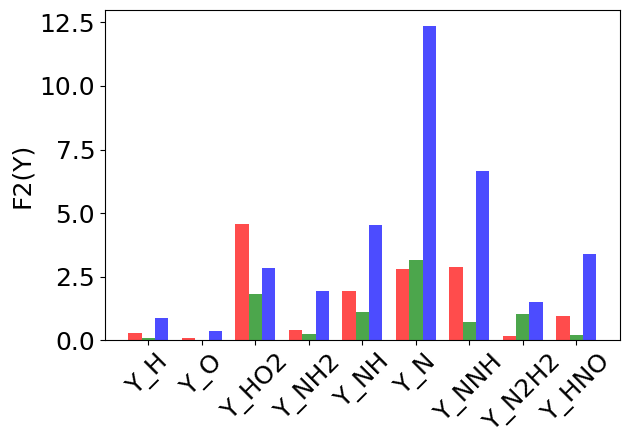

In [104]:

# Définir la largeur des barres
bar_width = 0.25
plt.rcParams.update({'font.size': 18})
plt.figure()

# Positions sur l'axe des x pour chaque barre (en fonction du nombre d'espèces)
x = np.arange(len(peak_species))

# Ajouter les barres pour F1r[0], F1o[0] et F1ob[0]
plt.bar(x - bar_width, np.sum(F2r,axis=0), width=bar_width,color="r", label="Reduced", alpha=0.7)
plt.bar(x, np.sum(F2o,axis=0), width=bar_width,color= "g", label="OPTIM A", alpha=0.7)
plt.bar(x + bar_width, np.sum(F2ob,axis=0), width=bar_width, color="b",label="OPTIM B", alpha=0.7)

# Ajouter des titres et des labels

plt.ylabel("F2(Y)")
plt.xticks(x, peak_species, rotation=45)
# plt.yscale("log")
plt.tight_layout()
plt.savefig("PMO_Err_F2.png")

In [128]:
print(np.array(F2ob)[:,peak_species.index("Y_N")])
print(np.sum(F2ob,axis=0))
print(np.sum(F2ob,axis=0)[peak_species.index("Y_N")])


[0.99599671 0.26589559 0.27793213 0.25483473 0.27731278 0.99343832
 0.33758048 0.32640755 0.32302918 0.34263236 0.98919159 0.43226045
 0.41905539 0.42134561 0.36404103 0.98803553 0.52404346 0.49492464
 0.49921221 0.49836634 0.02647123 0.59493016 0.57043328 0.57697374
 0.57295164]
[ 0.90111305  0.36643096  2.85580552  1.94912424  4.54911475 12.36729612
  6.65686244  1.52716303  3.39183644]
12.367296120497755


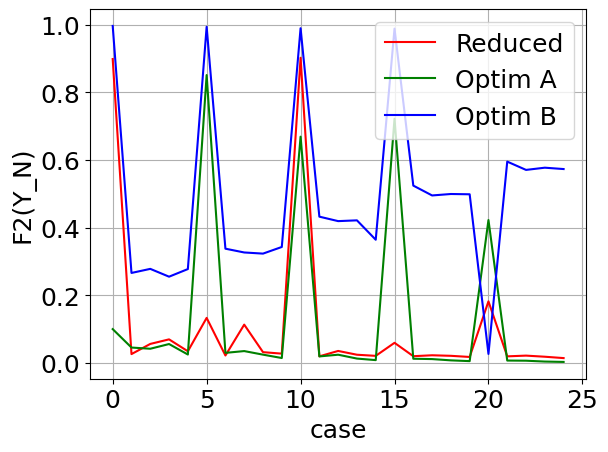

In [126]:
species = "Y_N"
plt.figure()
plt.plot(np.array(F2r)[:,peak_species.index(species)],"r",label="Reduced")
plt.plot(np.array(F2o)[:,peak_species.index(species)],"g",label="Optim A")
plt.plot(np.array(F2ob)[:,peak_species.index(species)],'b',label="Optim B")
plt.legend()
plt.xlabel("case")
plt.ylabel(f"F2({species})")
# plt.yscale("log")
plt.grid()

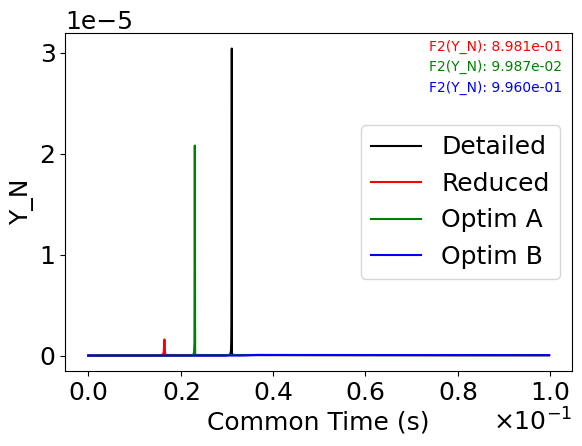

In [101]:
species = "Y_N"
selected_case = 0

loc_data_d = data_d.iloc[selected_case*lenght:selected_case*lenght+lenght]
loc_data_r =data_r.iloc[selected_case*lenght:selected_case*lenght+lenght]
loc_data_o =data_o.iloc[selected_case*lenght:selected_case*lenght+lenght]
loc_data_ob = data_ob.iloc[selected_case*lenght:selected_case*lenght+lenght]
plt.figure()

# Tracé des courbes
plt.plot(loc_data_d["common_grid"], loc_data_d[species], 'k', label="Detailed")
plt.plot(loc_data_r["common_grid"], loc_data_r[species], 'r', label="Reduced")
plt.plot(loc_data_o["common_grid"], loc_data_o[species], 'g', label="Optim A")
plt.plot(loc_data_ob["common_grid"], loc_data_ob[species], 'b', label="Optim B")

# Limites, légendes et axes
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
plt.legend()
plt.ylabel(f"{species}")
plt.xlabel("Common Time (s)")

# Récupération des valeurs
val_r = np.array(F2r)[selected_case,peak_species.index(species)]
val_o = np.array(F2o)[selected_case,peak_species.index(species)]
val_ob = np.array(F2ob)[selected_case,peak_species.index(species)]

# Position de départ du texte (en coordonnées Axes)
x_text = 0.98
y_start = 0.98
line_spacing = 0.06

# Texte coloré
plt.gca().text(x_text, y_start,     f"F2({species}): {val_r:.3e}", color='r',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')
plt.gca().text(x_text, y_start - line_spacing, f"F2({species}): {val_o:.3e}", color='g',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')
plt.gca().text(x_text, y_start - 2*line_spacing, f"F2({species}): {val_ob:.3e}", color='b',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.savefig(f"PMO_F2_{species}.png")


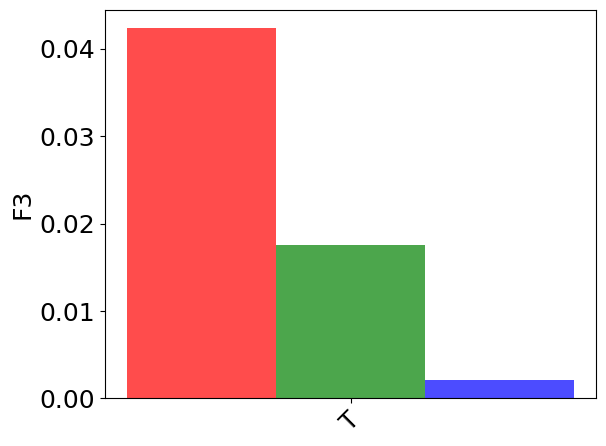

In [103]:

# Définir la largeur des barres
bar_width = 0.25
plt.rcParams.update({'font.size': 18})
plt.figure()

# Positions sur l'axe des x pour chaque barre (en fonction du nombre d'espèces)
x = np.arange(len(["T"]))

# Ajouter les barres pour F1r[0], F1o[0] et F1ob[0]
plt.bar(x - bar_width, np.sum(F3r,axis=0), width=bar_width,color="r", label="Reduced", alpha=0.7)
plt.bar(x, np.sum(F3o,axis=0), width=bar_width,color= "g", label="OPTIM A", alpha=0.7)
plt.bar(x + bar_width, np.sum(F3ob,axis=0), width=bar_width, color="b",label="OPTIM B", alpha=0.7)

# Ajouter des titres et des labels

plt.ylabel("F3")
plt.xticks(x, ["T"], rotation=45)
plt.tight_layout()
plt.savefig("PMO_Err_F3.png")

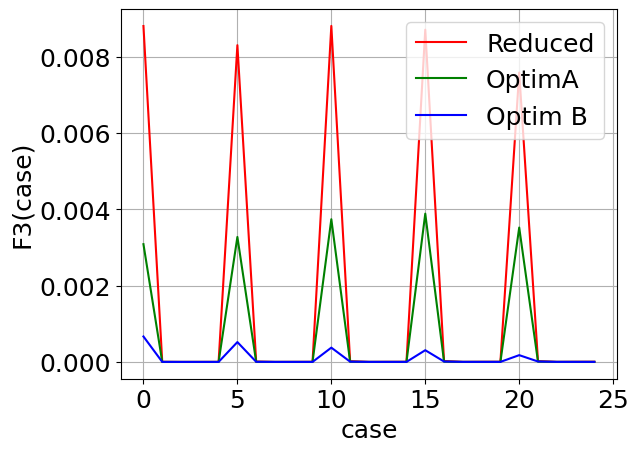

In [134]:
plt.figure()
plt.plot(F3r,'r',label="Reduced")
plt.plot(F3o,'g',label="OptimA")
plt.plot(F3ob,"b",label="Optim B")
plt.legend()
plt.xlabel("case")
plt.ylabel("F3(case)")
plt.grid()


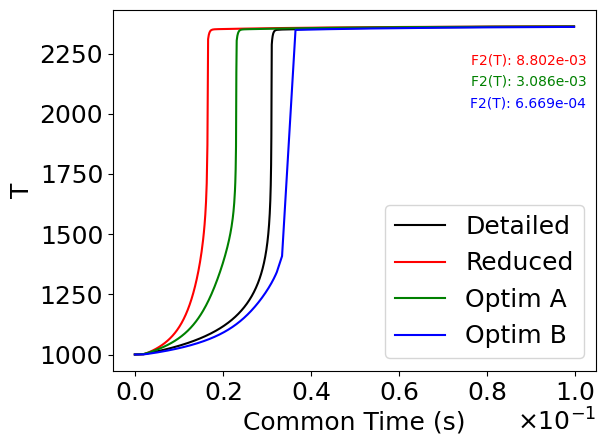

In [137]:
species = "T"
selected_case = 0

loc_data_d = data_d.iloc[selected_case*lenght:selected_case*lenght+lenght]
loc_data_r =data_r.iloc[selected_case*lenght:selected_case*lenght+lenght]
loc_data_o =data_o.iloc[selected_case*lenght:selected_case*lenght+lenght]
loc_data_ob = data_ob.iloc[selected_case*lenght:selected_case*lenght+lenght]
plt.figure()

# Tracé des courbes
plt.plot(loc_data_d["common_grid"], loc_data_d[species], 'k', label="Detailed")
plt.plot(loc_data_r["common_grid"], loc_data_r[species], 'r', label="Reduced")
plt.plot(loc_data_o["common_grid"], loc_data_o[species], 'g', label="Optim A")
plt.plot(loc_data_ob["common_grid"], loc_data_ob[species], 'b', label="Optim B")

# Limites, légendes et axes
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
plt.legend()
plt.ylabel(f"{species}")
plt.xlabel("Common Time (s)")

# Récupération des valeurs
val_r = np.array(F3r)[selected_case]
val_o = np.array(F3o)[selected_case]
val_ob = np.array(F3ob)[selected_case]

# Position de départ du texte (en coordonnées Axes)
x_text = 0.98
y_start = 0.88
line_spacing = 0.06

# Texte coloré
plt.gca().text(x_text, y_start,     f"F2({species}): {val_r:.3e}", color='r',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')
plt.gca().text(x_text, y_start - line_spacing, f"F2({species}): {val_o:.3e}", color='g',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')
plt.gca().text(x_text, y_start - 2*line_spacing, f"F2({species}): {val_ob:.3e}", color='b',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.savefig(f"PMO_F3_T.png")


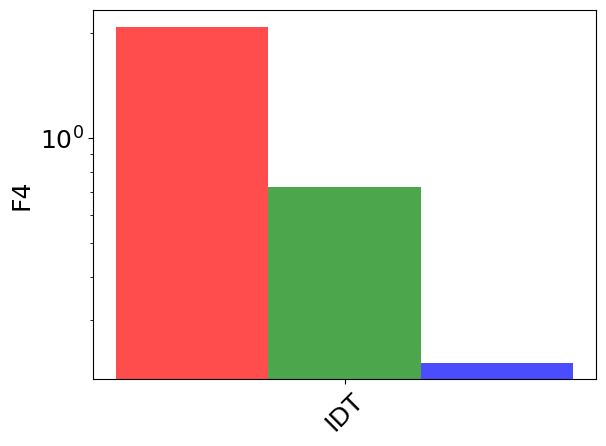

In [138]:

# Définir la largeur des barres
bar_width = 0.25
plt.rcParams.update({'font.size': 18})
plt.figure()

# Positions sur l'axe des x pour chaque barre (en fonction du nombre d'espèces)
x = np.arange(len(["IDT"]))

# Ajouter les barres pour F1r[0], F1o[0] et F1ob[0]
plt.bar(x - bar_width, np.sum(F4r,axis=0), width=bar_width,color="r", label="Reduced", alpha=0.7)
plt.bar(x, np.sum(F4o,axis=0), width=bar_width,color= "g", label="OPTIM A", alpha=0.7)
plt.bar(x + bar_width, np.sum(F4ob,axis=0), width=bar_width, color="b",label="OPTIM B", alpha=0.7)

# Ajouter des titres et des labels

plt.ylabel("F4")
plt.xticks(x, ["IDT"], rotation=45)
plt.yscale("log")
plt.tight_layout()
plt.savefig("PMO_Err_F4.png")